In [2]:
import pandas as pd
import numpy as np


In [3]:
#load the listing data
data = pd.read_csv('/Users/kkanchi/Downloads/RDC_Inventory_Core_Metrics_Zip_History.csv', header=0, parse_dates=True, low_memory=False)[:-2] # remove last two rows, which have shown 
#themselvse as weird
data['year-month'] = pd.to_datetime(data['month_date_yyyymm'], format='%Y%m')

In [4]:
data_nona=data.dropna()
data_nona.shape

(99327, 41)

In [5]:
data.shape

(1946980, 41)

In [6]:
data_nona.isnull().sum()

month_date_yyyymm                          0
postal_code                                0
zip_name                                   0
median_listing_price                       0
median_listing_price_mm                    0
median_listing_price_yy                    0
active_listing_count                       0
active_listing_count_mm                    0
active_listing_count_yy                    0
median_days_on_market                      0
median_days_on_market_mm                   0
median_days_on_market_yy                   0
new_listing_count                          0
new_listing_count_mm                       0
new_listing_count_yy                       0
price_increased_count                      0
price_increased_count_mm                   0
price_increased_count_yy                   0
price_reduced_count                        0
price_reduced_count_mm                     0
price_reduced_count_yy                     0
pending_listing_count                      0
pending_li

In [7]:
data.head(10)

,month_date_yyyymm,postal_code,zip_name,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,median_days_on_market,...,average_listing_price_mm,average_listing_price_yy,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy,quality_flag,year-month
0,202206,36609,"mobile, al",194950.0,0.0569,-0.0603,34.0,0.3077,0.4783,20.0,...,0.0866,-0.0316,42.0,0.1667,0.1667,0.2353,-0.1878,-0.2864,1.0,2022-06-01
1,202206,35739,"ardmore, al",329000.0,-0.0172,0.5932,5.0,0.0000,4.0000,18.0,...,-0.0704,1.0313,5.0,-0.1667,4.0000,0.0000,-0.2000,NaN,1.0,2022-06-01
2,202206,78629,"gonzales, tx",369000.0,-0.0004,0.3068,23.0,0.0952,0.5333,77.0,...,-0.0221,0.2845,38.0,-0.0952,0.2667,0.6522,-0.3478,-0.3478,1.0,2022-06-01
3,202206,78025,"ingram, tx",367000.0,-0.6929,0.1311,25.0,-0.1379,1.0833,60.0,...,-0.1390,0.6705,42.0,0.0500,1.0000,0.7200,0.3407,0.0533,1.0,2022-06-01
4,202206,78405,"corpus christi, tx",80000.0,-0.0857,0.1189,19.0,0.7273,1.7143,50.0,...,-0.0780,0.0950,29.0,0.3810,0.7059,0.4211,-0.3971,-0.8647,0.0,2022-06-01
5,202206,44809,"bascom, oh",169900.0,0.0059,NaN,1.0,NaN,NaN,22.0,...,0.0366,NaN,1.0,-0.5000,NaN,NaN,NaN,NaN,0.0,2022-06-01
6,202206,37821,"newport, tn",387450.0,0.2621,0.8498,50.0,-0.0385,0.3158,37.0,...,0.1876,0.3374,105.0,0.0396,0.2963,1.1000,0.1769,-0.0053,1.0,2022-06-01
7,202206,54639,"la farge, wi",419900.0,0.0000,1.2100,1.0,0.0000,-0.6667,19.0,...,0.0000,1.2085,2.0,1.0000,-0.5000,1.0000,NaN,0.6667,1.0,2022-06-01
8,202206,33403,"west palm beach, fl",509500.0,-0.1508,0.2769,32.0,0.0667,-0.0303,27.0,...,0.0427,0.3562,68.0,0.2830,-0.0423,1.0938,0.3604,-0.0275,0.0,2022-06-01
9,202206,90065,"los angeles, ca",1224500.0,0.0225,0.2270,42.0,0.4483,0.1053,27.0,...,0.0223,0.1918,67.0,0.1167,-0.2299,0.5952,-0.5427,-0.7206,0.0,2022-06-01


In [8]:
local_listing_sum = data[['year-month', 'active_listing_count']].groupby(['year-month']).sum().reset_index()

In [9]:
local_listing_sum

,year-month,active_listing_count
0,2016-07-01,1348986.0
1,2016-08-01,1340864.0
2,2016-09-01,1326737.0
3,2016-10-01,1300291.0
4,2016-11-01,1220139.0
...,...,...
67,2022-02-01,369446.0
68,2022-03-01,375486.0
69,2022-04-01,417051.0
70,2022-05-01,505023.0


In [10]:
#anyfilter for specific zipcodes
zipcodes = pd.read_csv('./zipcodes.csv')
# My dataset strips the leading 0 from zipcodes, which happens to be what the other dataset came as too.
#Since they both do this, the sets can still be compared without additional work (unlike R)
zipcodes['zipcode'] = zipcodes['zipcode'].astype(str)
local_data = data[data['postal_code'].isin(zipcodes['zipcode'])]

FileNotFoundError: [Errno 2] No such file or directory: './zipcodes.csv'

In [11]:
data.dtypes
#data.info()

month_date_yyyymm                                   int64
postal_code                                         int64
zip_name                                           object
median_listing_price                              float64
median_listing_price_mm                           float64
median_listing_price_yy                           float64
active_listing_count                              float64
active_listing_count_mm                           float64
active_listing_count_yy                           float64
median_days_on_market                             float64
median_days_on_market_mm                          float64
median_days_on_market_yy                          float64
new_listing_count                                 float64
new_listing_count_mm                              float64
new_listing_count_yy                              float64
price_increased_count                             float64
price_increased_count_mm                          float64
price_increase

In [12]:
data.describe()

,month_date_yyyymm,postal_code,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,median_days_on_market,median_days_on_market_mm,...,average_listing_price,average_listing_price_mm,average_listing_price_yy,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy,quality_flag
count,1.946980e+06,1.946980e+06,1.943264e+06,1.667866e+06,1.613053e+06,1.943264e+06,1.654523e+06,1.599605e+06,1.946980e+06,1.669916e+06,...,1.943264e+06,1.667866e+06,1.613053e+06,1.944355e+06,1.677447e+06,1.619546e+06,1.557992e+06,1.233047e+06,1.128849e+06,1.712509e+06
mean,2.019161e+05,4.864791e+04,3.592070e+05,8.141494e+00,1.104328e+01,3.733421e+01,2.060425e-02,-1.393356e-02,9.643605e+01,2.438525e-01,...,4.195635e+05,6.373960e+00,9.265154e+00,5.461179e+01,2.362304e-02,5.115323e-02,inf,NaN,NaN,5.761470e-01
std,1.700469e+02,2.783093e+04,9.378086e+05,1.480826e+03,1.947873e+03,6.787078e+01,3.821563e-01,8.424438e-01,1.051791e+02,2.129505e+00,...,9.542143e+05,1.286537e+03,1.673457e+03,9.228440e+01,3.470030e-01,8.939840e-01,NaN,NaN,NaN,4.941678e-01
min,2.016070e+05,1.001000e+03,1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,...,1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,-inf,-inf,0.000000e+00
25%,2.018030e+05,2.520100e+04,1.497000e+05,-3.570000e-02,-8.060000e-02,3.000000e+00,-1.176000e-01,-4.286000e-01,4.300000e+01,-1.237000e-01,...,1.660198e+05,-4.090000e-02,-8.830000e-02,5.000000e+00,-9.860000e-02,-3.214000e-01,1.924000e-01,-1.013000e-01,-7.490000e-02,0.000000e+00
50%,2.019080e+05,4.819700e+04,2.490000e+05,0.000000e+00,6.380000e-02,1.300000e+01,0.000000e+00,-1.400000e-01,7.000000e+01,1.034000e-01,...,2.767060e+05,0.000000e+00,6.230000e-02,1.900000e+01,0.000000e+00,-7.810000e-02,4.800000e-01,0.000000e+00,6.790000e-02,1.000000e+00
75%,2.021010e+05,7.200300e+04,3.990000e+05,4.010000e-02,2.654000e-01,4.300000e+01,8.110000e-02,1.200000e-01,1.150000e+02,3.023000e-01,...,4.579335e+05,5.000000e-02,2.603000e-01,6.700000e+01,8.000000e-02,1.667000e-01,1.000000e+00,1.303000e-01,4.211000e-01,1.000000e+00
max,2.022060e+05,9.995000e+04,2.790000e+08,6.989990e+05,7.989990e+05,2.658000e+03,6.800000e+01,1.950000e+02,4.330000e+03,8.600000e+02,...,2.790000e+08,6.989990e+05,7.989990e+05,2.878000e+03,6.800000e+01,3.510000e+02,inf,inf,inf,1.000000e+00


In [20]:
data["postal_code"].value_counts()

27401    72
11963    72
28016    72
54016    72
27882    72
         ..
95671     1
32121     1
40231     1
80962     1
20235     1
Name: postal_code, Length: 34926, dtype: int64

In [37]:
data["postal_code"].nunique()

34926

In [24]:
data.columns

Index(['month_date_yyyymm', 'postal_code', 'zip_name', 'median_listing_price',
       'median_listing_price_mm', 'median_listing_price_yy',
       'active_listing_count', 'active_listing_count_mm',
       'active_listing_count_yy', 'median_days_on_market',
       'median_days_on_market_mm', 'median_days_on_market_yy',
       'new_listing_count', 'new_listing_count_mm', 'new_listing_count_yy',
       'price_increased_count', 'price_increased_count_mm',
       'price_increased_count_yy', 'price_reduced_count',
       'price_reduced_count_mm', 'price_reduced_count_yy',
       'pending_listing_count', 'pending_listing_count_mm',
       'pending_listing_count_yy', 'median_listing_price_per_square_foot',
       'median_listing_price_per_square_foot_mm',
       'median_listing_price_per_square_foot_yy', 'median_square_feet',
       'median_square_feet_mm', 'median_square_feet_yy',
       'average_listing_price', 'average_listing_price_mm',
       'average_listing_price_yy', 'total_listing_cou

In [13]:
#load the listing data
zip_lat_data = pd.read_csv('/Users/kkanchi/Downloads/all_us_zipcodes_LA_Long.csv', header=0)

In [14]:
zip_lat_data.head()

,code,city,state,county,area_code,lat,lon
0,501,Holtsville,NY,SUFFOLK,NaN,40.922326,-72.637078
1,544,Holtsville,NY,SUFFOLK,NaN,40.922326,-72.637078
2,1001,Agawam,MA,HAMPDEN,NaN,42.140549,-72.788661
3,1002,Amherst,MA,HAMPSHIRE,NaN,42.367092,-72.464571
4,1003,Amherst,MA,HAMPSHIRE,NaN,42.369562,-72.635990


In [15]:
zip_lat_data.shape

(42366, 7)

In [16]:
zip_lat_data.tail()

,code,city,state,county,area_code,lat,lon
42361,99926,Metlakatla,AK,PRINCE WALES KETCHIKAN,NaN,55.094325,-131.566827
42362,99927,Point Baker,AK,PRINCE WALES KETCHIKAN,NaN,55.517921,-132.003244
42363,99928,Ward Cove,AK,KETCHIKAN GATEWAY,NaN,55.395359,-131.675370
42364,99929,Wrangell,AK,WRANGELL PETERSBURG,NaN,56.449893,-132.364407
42365,99950,Ketchikan,AK,KETCHIKAN GATEWAY,NaN,55.542007,-131.432682


In [17]:
zip_lat_data["code"].nunique()

42366

In [19]:
zip_lat_data_nona=zip_lat_data.drop(columns=["area_code"])
zip_lat_data_nona.head()

,code,city,state,county,lat,lon
0,501,Holtsville,NY,SUFFOLK,40.922326,-72.637078
1,544,Holtsville,NY,SUFFOLK,40.922326,-72.637078
2,1001,Agawam,MA,HAMPDEN,42.140549,-72.788661
3,1002,Amherst,MA,HAMPSHIRE,42.367092,-72.464571
4,1003,Amherst,MA,HAMPSHIRE,42.369562,-72.635990


In [20]:
zip_lat_data_nona=zip_lat_data_nona.dropna()
zip_lat_data_nona.shape

(42354, 6)

In [21]:
zip_lat_data_nona.isnull().sum()

code      0
city      0
state     0
county    0
lat       0
lon       0
dtype: int64

In [22]:
zip_lat_data_nona.rename(columns={"code":"postal_code"},inplace=True)
zip_lat_data_nona.head()

,postal_code,city,state,county,lat,lon
0,501,Holtsville,NY,SUFFOLK,40.922326,-72.637078
1,544,Holtsville,NY,SUFFOLK,40.922326,-72.637078
2,1001,Agawam,MA,HAMPDEN,42.140549,-72.788661
3,1002,Amherst,MA,HAMPSHIRE,42.367092,-72.464571
4,1003,Amherst,MA,HAMPSHIRE,42.369562,-72.635990


In [23]:
file.to_csv('/Users/kkanchi/Documents/Bootcamp/Challenges/Module2/FinalProject/Resources/zip_lat_data_nona.csv', index=False)

NameError: name 'file' is not defined

In [25]:
file_path="Resources/zip_lat_data_nona.csv"
zip_lat_data_nona.to_csv(file_path,index=False)

In [26]:
file_path="Resources/data_nona.csv"
data_nona.to_csv(file_path,index=False)

In [27]:
merge_dataset=data_nona.merge(zip_lat_data_nona,how='left', left_on='postal_code', right_on='postal_code')
merge_dataset.head()

,month_date_yyyymm,postal_code,zip_name,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,median_days_on_market,...,pending_ratio,pending_ratio_mm,pending_ratio_yy,quality_flag,year-month,city,state,county,lat,lon
0,202206,33572,"apollo beach, fl",731950.0,0.1665,0.5577,93.0,0.4091,0.9787,24.0,...,1.9785,-0.7336,-1.5534,1.0,2022-06-01,Apollo Beach,FL,HILLSBOROUGH,27.845790,-82.331983
1,202206,28445,"holly ridge, nc",687450.0,0.1325,0.4761,77.0,0.3750,0.2833,33.0,...,3.1429,-1.0714,-1.0905,1.0,2022-06-01,Holly Ridge,NC,ONSLOW,34.527983,-77.514707
2,202206,78634,"hutto, tx",472500.0,0.0071,0.2459,134.0,0.6962,0.8356,16.0,...,0.3358,-0.2465,-0.5820,1.0,2022-06-01,Hutto,TX,WILLIAMSON,30.551885,-97.554189
3,202206,20872,"damascus, md",731995.0,0.0028,0.2642,16.0,-0.0588,-0.1111,53.0,...,1.2500,0.3676,-0.1944,1.0,2022-06-01,Damascus,MD,MONTGOMERY,39.285477,-77.215203
4,202206,87121,"albuquerque, nm",271000.0,0.0131,0.2047,35.0,-0.1026,0.2069,36.0,...,3.5429,0.3634,-1.0089,1.0,2022-06-01,Albuquerque,NM,BERNALILLO,35.059663,-106.805535


In [28]:
merge_dataset.shape

(99327, 46)

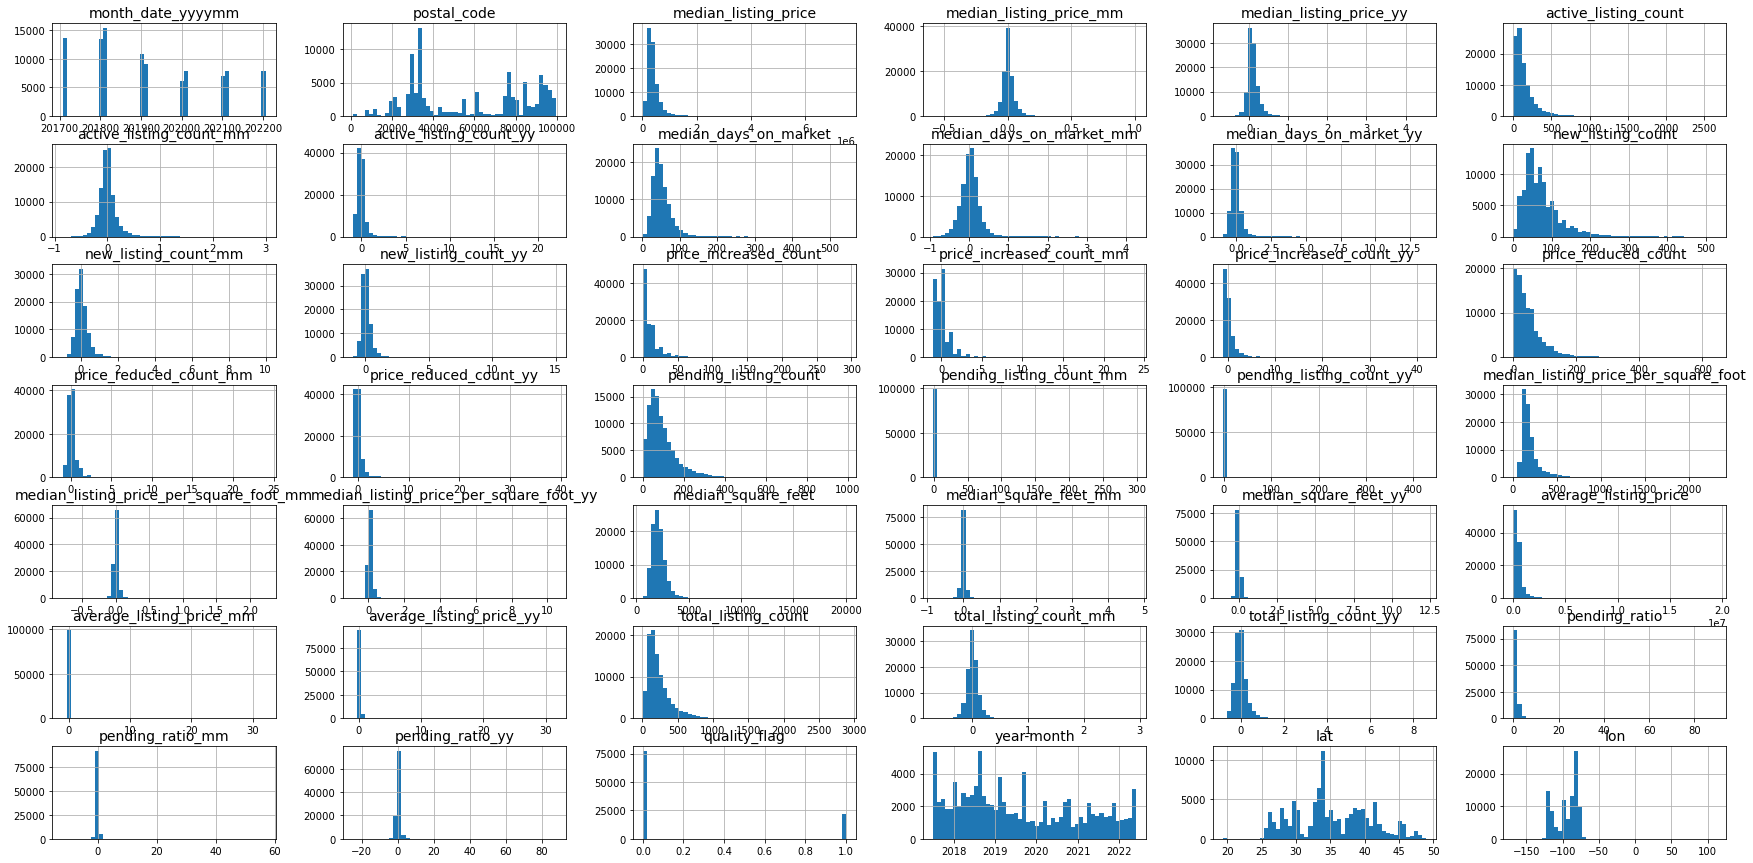

In [32]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

merge_dataset.hist(bins=50, figsize=(30, 15))
#save_fig("attribute_histogram_plots")  # extra code
plt.show()